In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


2024-10-16 15:51:51.507844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 15:51:51.569736: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 15:51:51.587206: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 15:51:51.714311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 15:51:52.719354: W tensorflow/compiler/tf2

In [2]:
import os
import glob as gb

base_path = ''
train_path = os.path.join(base_path, 'Multiple Sclerosis')
folders = os.listdir(train_path)

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    files = gb.glob(os.path.join(folder_path, '*.png'))
    print(f"For training data, found {len(files)} in folder {folder}")



For training data, found 1002 in folder Control-Axial
For training data, found 650 in folder MS-Axial
For training data, found 1014 in folder Control-Sagittal
For training data, found 761 in folder MS-Sagittal


In [3]:
size = []
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(618, 758, 4)        2
(719, 1493, 4)       2
(543, 487, 4)        1
(606, 722, 4)        1
(515, 450, 4)        1
(687, 912, 4)        1
Name: count, dtype: int64

In [4]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [5]:
s = 224

In [6]:
x_train= []
y_train= []
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])


In [7]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


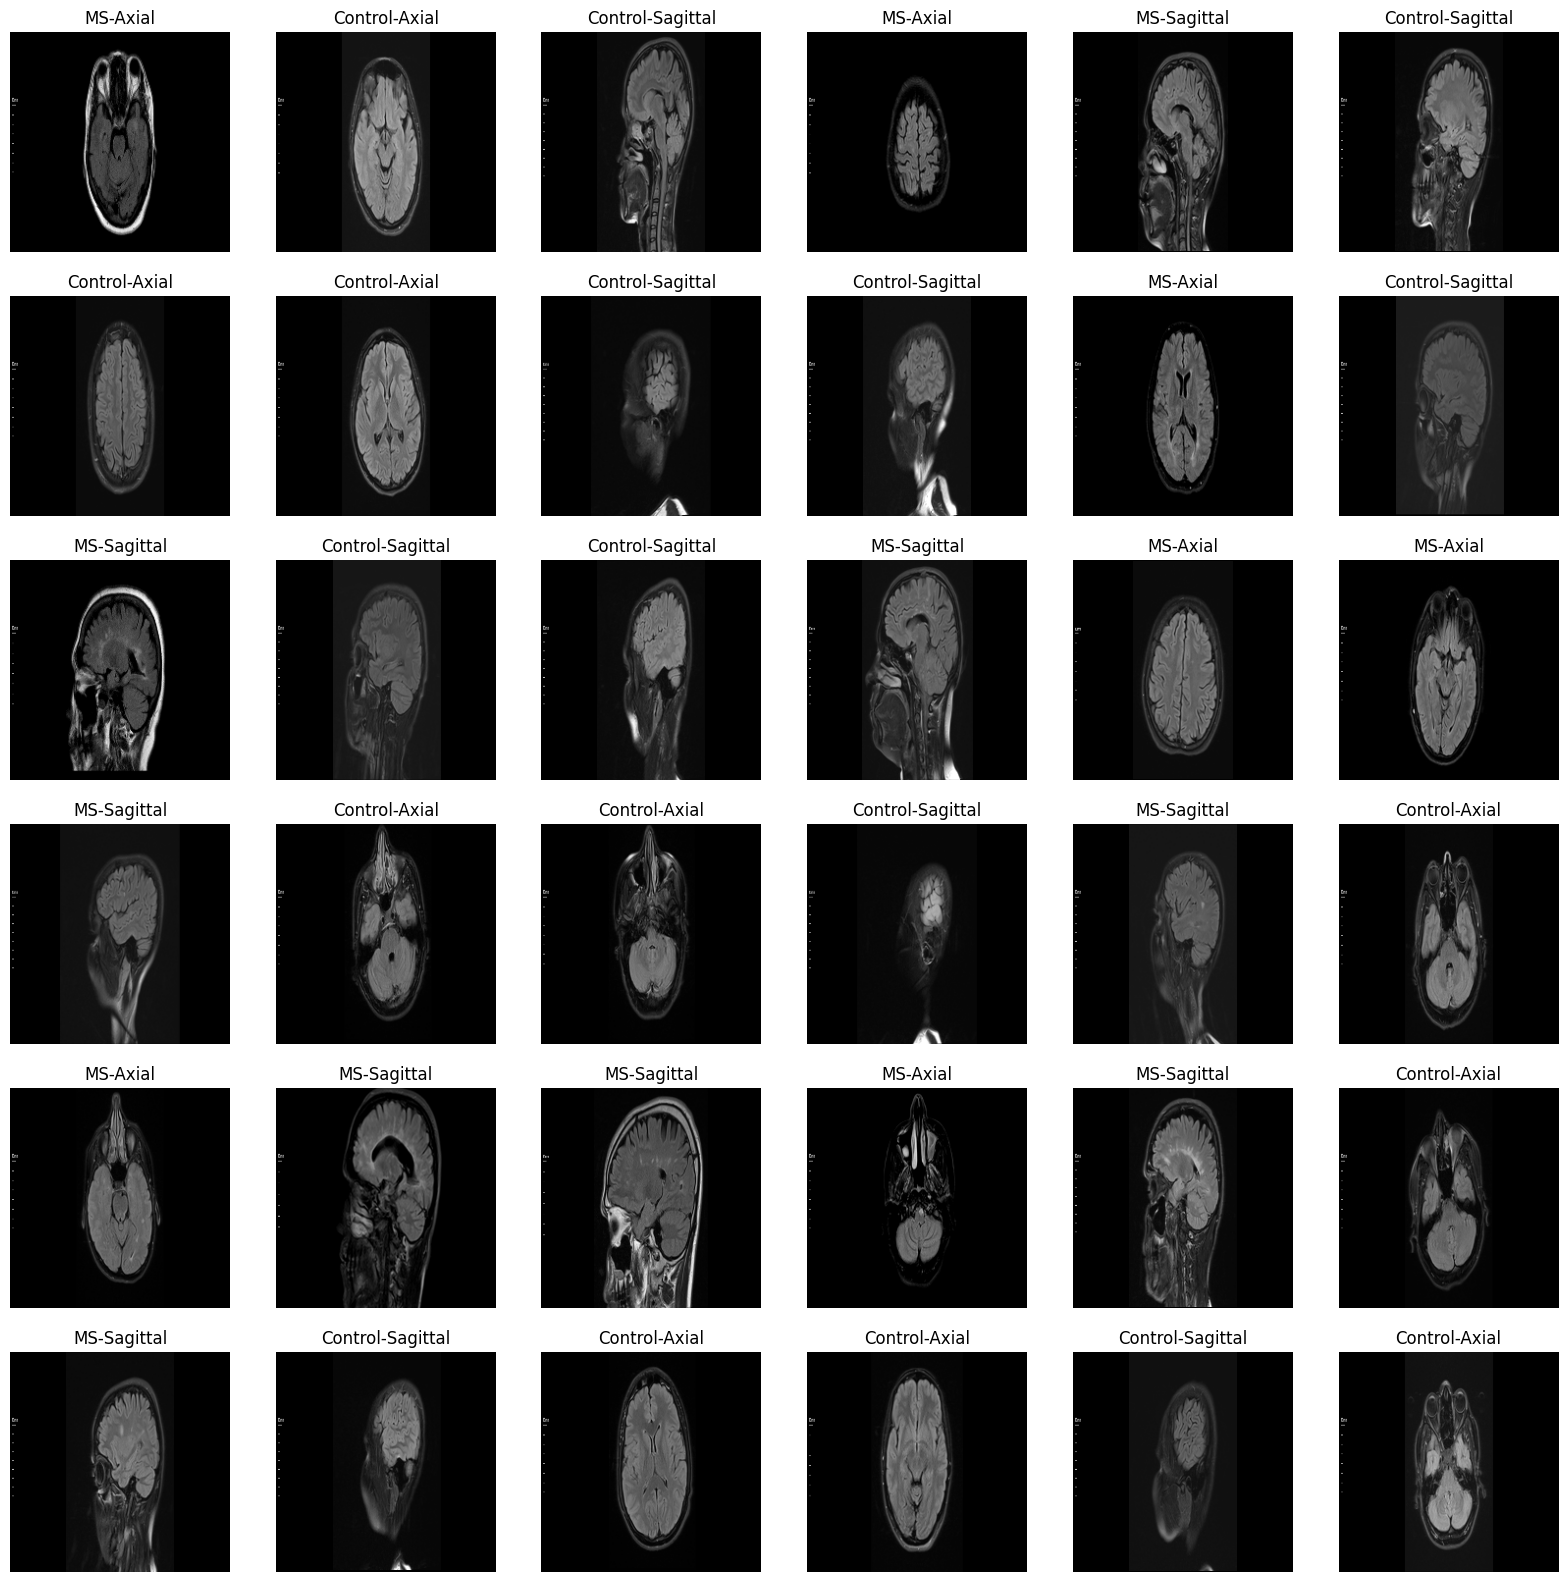

In [8]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 224, 224, 3)
y_train shape is (3427,)


In [10]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

num_classes = 4  

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(s, s, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with the number of classes

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

history = model.fit(x_train, y_train_encoded,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_val, y_val_encoded))

y_test_encoded = to_categorical(y_test, num_classes)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()


/home/rohithk/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729074158.722143    7037 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729074158.918216    7037 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729074158.920937    7037 cuda_exec

Epoch 1/30


I0000 00:00:1729074170.044601    9658 service.cc:146] XLA service 0x73dcfc005460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729074170.044653    9658 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2024-10-16 15:52:50.079753: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-16 15:52:50.250082: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-16 15:52:50.481154: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-16 15:52:50.485701: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/rohithk/venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/rohithk/venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/rohithk/venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/rohithk/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/rohithk/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/rohithk/venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/rohithk/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/rohithk/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/rohithk/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_7037/3166917514.py", line 43, in <module>

  File "/home/rohithk/venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/rohithk/venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/rohithk/venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

Out of memory while trying to allocate 16777344 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_2106]

In [46]:
# Step 6: Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)

# Print test accuracy

print("Test accuracy:", test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9619 - loss: 0.1229
Test accuracy: 0.9650145769119263


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      0.98      0.96       102
     Class 1       0.99      0.99      0.99       106
     Class 2       0.95      0.90      0.92        67
     Class 3       0.99      0.97      0.98        68

    accuracy                           0.97       343
   macro avg       0.97      0.96      0.96       343
weighted avg       0.97      0.97      0.96       343

Weighted Precision: 0.9654
Weighted Recall: 0.9650
Weighted F1-score: 0.9648


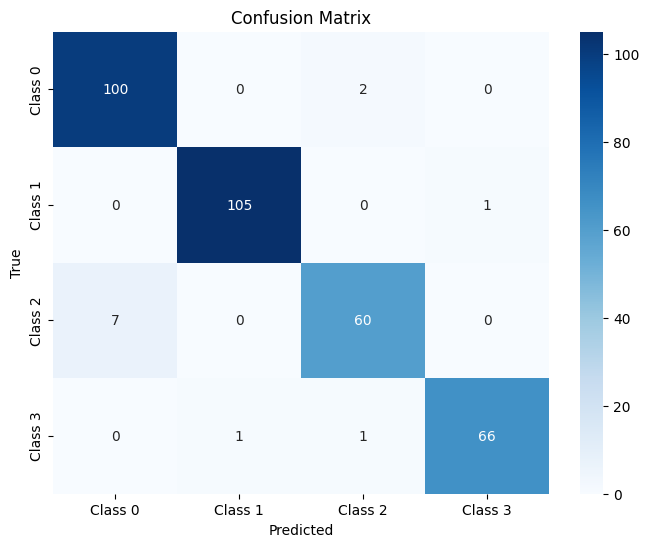

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Assuming you have already trained and evaluated your model, and you have true_labels
true_labels = y_test  # True labels from your test set

# Predict probabilities using the model
predicted_probabilities = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate and print classification report
report = classification_report(true_labels, predicted_labels, target_names=[f'Class {i}' for i in range(num_classes)])
print("Classification Report:\n", report)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)],
            yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [48]:
from tensorflow.keras.models import load_model
model.save("cnn_task3.h5")